<a href="https://colab.research.google.com/github/Raghavardhini/Raghavardhini/blob/main/naive%20bayes%20classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv("/content/study_performance.csv")
print(data)

    Maths  Read  Write  Total
0      72    72     74    218
1      69    90     88    247
2      90    95     93    278
3      47    57     44    148
4      76    78     75    229
..    ...   ...    ...    ...
93     43    45     50    138
94     79    86     92    257
95     78    81     82    241
96     65    66     62    193
97     63    72     70    205

[98 rows x 4 columns]


In [ ]:
data = data.fillna(2)
data

,Maths,Read,Write,Total
0,72,72,74,218
1,69,90,88,247
2,90,95,93,278
3,47,57,44,148
4,76,78,75,229
...,...,...,...,...
93,43,45,50,138
94,79,86,92,257
95,78,81,82,241
96,65,66,62,193


In [ ]:
data = data.dropna()
data

,Maths,Read,Write,Total
0,72,72,74,218
1,69,90,88,247
2,90,95,93,278
3,47,57,44,148
4,76,78,75,229
...,...,...,...,...
93,43,45,50,138
94,79,86,92,257
95,78,81,82,241
96,65,66,62,193


In [ ]:
data = data.interpolate()
data

,Maths,Read,Write,Total
0,72,72,74,218
1,69,90,88,247
2,90,95,93,278
3,47,57,44,148
4,76,78,75,229
...,...,...,...,...
93,43,45,50,138
94,79,86,92,257
95,78,81,82,241
96,65,66,62,193


In [ ]:
X = data.loc[:,["Maths","Read"]]
y = data["Total"]
new=pd.DataFrame(X,y)
print(new)

       Maths  Read
Total             
218      NaN   NaN
247      NaN   NaN
278      NaN   NaN
148      NaN   NaN
229      NaN   NaN
...      ...   ...
138      NaN   NaN
257      NaN   NaN
241      NaN   NaN
193      NaN   NaN
205      NaN   NaN

[98 rows x 2 columns]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
classifier = GaussianNB()

In [ ]:
classifier.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred = classifier.predict(X_test)
print(y_pred)

[195 173 253 139 139 193 175 173 173 205 195 139 205 195 173 241 148 220
 205 175]


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.05


In [ ]:
for i, prediction in enumerate(y_pred):
    if prediction == 1:
        print("Student with features:", X_test[i], "is at risk.")

In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

         123       0.00      0.00      0.00         1
         134       0.00      0.00      0.00         1
         139       0.33      1.00      0.50         1
         148       0.00      0.00      0.00         0
         151       0.00      0.00      0.00         1
         160       0.00      0.00      0.00         1
         164       0.00      0.00      0.00         1
         170       0.00      0.00      0.00         1
         173       0.00      0.00      0.00         0
         174       0.00      0.00      0.00         1
         175       0.00      0.00      0.00         0
         176       0.00      0.00      0.00         2
         178       0.00      0.00      0.00         2
         189       0.00      0.00      0.00         1
         193       0.00      0.00      0.00         0
         195       0.00      0.00      0.00         0
         199       0.00      0.00      0.00         1
    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [ ]:
false_percentage = (1 - accuracy) * 100
print("False Percentage:", false_percentage)

False Percentage: 95.0


In [ ]:
new=pd.DataFrame(X_test,y_pred)
print(new)

     Maths  Read
195    NaN   NaN
173    NaN   NaN
253    NaN   NaN
139    NaN   NaN
139    NaN   NaN
193    NaN   NaN
175    NaN   NaN
173    NaN   NaN
173    NaN   NaN
205    NaN   NaN
195    NaN   NaN
139    NaN   NaN
205    NaN   NaN
195    NaN   NaN
173    NaN   NaN
241    NaN   NaN
148    NaN   NaN
220    NaN   NaN
205    NaN   NaN
175    NaN   NaN


In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 0, 0, 0, 

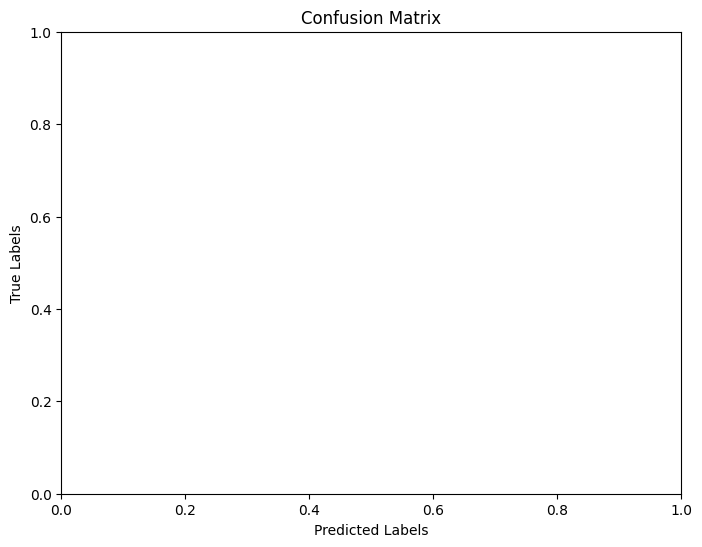

In [ ]:
import matplotlib.pyplot as plt
# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()